# Nivell 1

## Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 



Al igual que en l'exercici anterior es treballarà amb dades de pluviometria acumulada provinent de metecat de la ciutat de Barcelona en el següent punt cartogràfic:
* LAT (º): 41,41864 
* LONG (º): 2,12379
* ALT (m): 411

El dataframe mostra les plujes acumulades en mm per a tots els mesos de cada any des de l'any 1786 fins el 2021. En el cas del 1786 els 6 primers mesos de l'any son NAs i per això mostren un valor negatiu. Per tant, primer s'acabarà d'assegurar que no hi ha més NAs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pluvi =  pluvi = pd.read_csv('C:/Users/Guillermo/Desktop/Curs Data Scientist/Sprint 5/Barcelona_PPT_m_1786_2021.txt',
                   sep='\t')

In [29]:
pluvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ANY     236 non-null    int64  
 1   G       236 non-null    float64
 2   F       236 non-null    float64
 3   M       236 non-null    float64
 4   A       236 non-null    float64
 5   M.1     236 non-null    float64
 6   J       236 non-null    float64
 7   J.1     236 non-null    float64
 8   A.1     236 non-null    float64
 9   S       236 non-null    float64
 10  O       236 non-null    float64
 11  N       236 non-null    float64
 12  D       236 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 24.1 KB


In [5]:
pluvi.head()

,ANY,G,F,M,A,M.1,J,J.1,A.1,S,O,N,D
0,1786,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,6.8,52.1,62.0,57.0,195.8,114.1
1,1787,136.4,27.4,44.6,76.9,0.0,29.8,34.7,14.9,205.8,12.4,42.2,0.0
2,1788,9.9,14.9,32.2,12.4,7.5,146.3,59.4,29.8,123.9,163.6,106.6,22.3
3,1789,12.4,12.4,23.6,9.9,32.2,9.9,6.3,69.4,18.7,52.1,18.7,76.9
4,1790,44.6,1.2,188.5,74.4,44.7,39.7,65.7,32.3,71.9,205.8,72.0,14.9


In [6]:
pluvi.tail()

,ANY,G,F,M,A,M.1,J,J.1,A.1,S,O,N,D
231,2017,32.0,31.2,136.4,48.1,20.4,25.9,7.2,17.4,53.3,128.2,15.2,3.1
232,2018,63.6,104.6,112.5,83.0,30.3,53.1,51.5,36.5,44.4,201.9,201.8,4.8
233,2019,18.2,4.6,0.3,36.2,109.0,19.3,75.8,23.1,71.5,83.2,39.4,119.2
234,2020,89.3,2.8,61.6,258.7,29.2,69.1,23.1,12.4,60.2,23.1,52.5,41.5
235,2021,26.2,26.5,7.7,62.7,13.4,7.8,9.0,8.3,23.3,63.0,75.9,3.8


In [4]:
pluvi.shape

(236, 13)

In [8]:
pluvi.isna().sum()

ANY    0
G      0
F      0
M      0
A      0
M.1    0
J      0
J.1    0
A.1    0
S      0
O      0
N      0
D      0
dtype: int64

Com els NAs en la taula estan representats com -999.9 es mirarà en quins anys es dona aquest valor

In [14]:
names = pluvi.columns

In [30]:
for i in names:
    print(pluvi[pluvi[i]==-999.9])
        
    

Empty DataFrame
Columns: [ANY, G, F, M, A, M.1, J, J.1, A.1, S, O, N, D]
Index: []
    ANY      G      F      M      A    M.1      J  J.1   A.1     S     O  \
0  1786 -999.9 -999.9 -999.9 -999.9 -999.9 -999.9  6.8  52.1  62.0  57.0   

       N      D  
0  195.8  114.1  
    ANY      G      F      M      A    M.1      J  J.1   A.1     S     O  \
0  1786 -999.9 -999.9 -999.9 -999.9 -999.9 -999.9  6.8  52.1  62.0  57.0   

       N      D  
0  195.8  114.1  
    ANY      G      F      M      A    M.1      J  J.1   A.1     S     O  \
0  1786 -999.9 -999.9 -999.9 -999.9 -999.9 -999.9  6.8  52.1  62.0  57.0   

       N      D  
0  195.8  114.1  
    ANY      G      F      M      A    M.1      J  J.1   A.1     S     O  \
0  1786 -999.9 -999.9 -999.9 -999.9 -999.9 -999.9  6.8  52.1  62.0  57.0   

       N      D  
0  195.8  114.1  
    ANY      G      F      M      A    M.1      J  J.1   A.1     S     O  \
0  1786 -999.9 -999.9 -999.9 -999.9 -999.9 -999.9  6.8  52.1  62.0  57.0   

       N

Només en l'any 1786 hi ha NAs com a -999.9. Per tant, per poder comparar tots els mesos l'eliminarem del registre.

In [4]:
 plu2 = pluvi.iloc[1:,]

In [38]:
#confirmene que la eliminació és correcte
print(pluvi.shape)
print(plu2.shape)

(236, 13)
(235, 13)


In [39]:
plu2.head()

,ANY,G,F,M,A,M.1,J,J.1,A.1,S,O,N,D
1,1787,136.4,27.4,44.6,76.9,0.0,29.8,34.7,14.9,205.8,12.4,42.2,0.0
2,1788,9.9,14.9,32.2,12.4,7.5,146.3,59.4,29.8,123.9,163.6,106.6,22.3
3,1789,12.4,12.4,23.6,9.9,32.2,9.9,6.3,69.4,18.7,52.1,18.7,76.9
4,1790,44.6,1.2,188.5,74.4,44.7,39.7,65.7,32.3,71.9,205.8,72.0,14.9
5,1791,9.9,34.7,9.9,31.1,148.8,2.5,1.2,1.2,119.0,89.2,109.1,34.7


A continuació es passa a calcular la moda, la mediana, la desviació estàndard i la mitjana aritmètica del mesos de setembre i agost, ja que el primer és l'inici de la tardor i tradicionalment plou. Mentre que l'agost sol ser el mes més sec de l'any.

Com falta la moda s'importa la llibreria statistics.

In [58]:
import statistics as stat
print(dir(stat))

['Counter', 'Decimal', 'Fraction', 'NormalDist', 'StatisticsError', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_coerce', '_convert', '_exact_ratio', '_fail_neg', '_find_lteq', '_find_rteq', '_isfinite', '_normal_dist_inv_cdf', '_ss', '_sum', 'bisect_left', 'bisect_right', 'erf', 'exp', 'fabs', 'fmean', 'fsum', 'geometric_mean', 'groupby', 'harmonic_mean', 'hypot', 'itemgetter', 'log', 'math', 'mean', 'median', 'median_grouped', 'median_high', 'median_low', 'mode', 'multimode', 'numbers', 'pstdev', 'pvariance', 'quantiles', 'random', 'sqrt', 'stdev', 'tau', 'variance']


In [44]:
a = ['A.1', 'S']

In [60]:
for i in a:
    print('mean:\n', i, plu2[i].mean())
    print('median:\n', i, plu2[i].median())
    print('std:\n', i, plu2[i].mean())
    print('moda:\n', i, stat.mode(plu2[i]))
    

mean:
 A.1 39.13702127659572
median:
 A.1 29.8
std:
 A.1 39.13702127659572
moda:
 A.1 0.0
mean:
 S 78.84723404255314
median:
 S 68.4
std:
 S 78.84723404255314
moda:
 S 101.6


Dels valors anteriors podem extreure, tal com era previst, que a l'agost plou menys que al setembre. A més, la dispersió de la pluviometria en relació a la mitja és molt més gran durant el mes de setembre que l'agost. Per un altre costat, la moda surt molt diferent en totes dues estacions, sent a l'agost de 0 mm i al setembre de 101.6 mm.  Tot i les diferències que hi ha, és curiós que la distància entre la mitja i la mitjana sigui semblant en totes dues estacions.

Per tant, es graficarà un boxplot per a cada mes i la mitja es representarà amb una línia vermella.

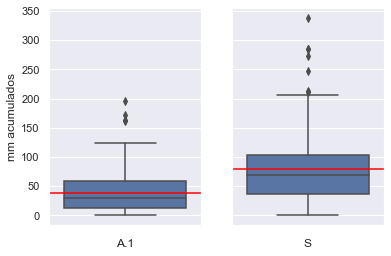

In [26]:
sns.set()
f, ax = plt.subplots(1, 2, sharey=True)
sns.boxplot( y= plu2['S'], orient = 'v')
plt.axhline(plu2['S'].mean(), color = 'red')
plt.xlabel('S')
plt.ylabel(' ')
plt.subplot(1,2,1)
sns.boxplot(y = plu2['A.1'], orient = 'v')
plt.axhline(plu2['A.1'].mean(), color = 'red')
plt.xlabel('A.1')
plt.ylabel('mm acumulados')
plt.subplot(1,2,2)
#plt.boxplot
#plt.boxplot( plu2['A.1'])
plt.show()


A continuació es graficarà la comparació de la pluviometria entre tots dos mesos des del 1787 fins al 2021 per veure si a simple vista hi ha algun tipus de relació.

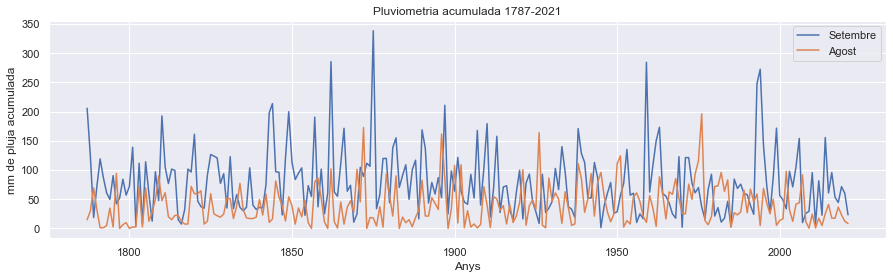

In [52]:
sns.set()
plt.figure(figsize=(15,4))
plt.plot(plu2['ANY'], plu2['S'])
plt.plot(plu2['ANY'], plu2['A.1'])
plt.legend( ['Setembre', 'Agost'])
plt.title('Pluviometria acumulada 1787-2021')
plt.xlabel('Anys')
plt.ylabel('mm de pluja acumulada')
plt.show()

Observant la gràfica de pluviometria acumulada sembla que en alguns anys hi hagi certa correlació d'anys plujosos. Presentant tots dos mesos al mateix any un pic de pluja, mentre que en altres anys sembla el contrari. Plovent molt al setembre i poc a l'agost.

Per tant, es passarà a comprobar la correlació entre totes dues variables

## Exercici 2

Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

Per mesurar la correlació entre les dues variables s'utilitzarà la correlació de Pearson.

In [28]:
np.corrcoef(plu2['S'], plu2['A.1'])

array([[ 1.       , -0.0278762],
       [-0.0278762,  1.       ]])

Com era d'esperar no hi ha relació entre la pluviometria d'un mes i el següent. Igualment, es calcularà el p-valor per confirmar si estadísticament es significatiu el resultat obtingut.



In [29]:
np.corrcoef(plu2)

array([[1.        , 0.98783893, 0.98900315, ..., 0.9886288 , 0.9904756 ,
        0.99226269],
       [0.98783893, 1.        , 0.99187506, ..., 0.99161115, 0.98387148,
        0.99398577],
       [0.98900315, 0.99187506, 1.        , ..., 0.99788219, 0.98990905,
        0.99749053],
       ...,
       [0.9886288 , 0.99161115, 0.99788219, ..., 1.        , 0.98904104,
        0.99634395],
       [0.9904756 , 0.98387148, 0.98990905, ..., 0.98904104, 1.        ,
        0.99414612],
       [0.99226269, 0.99398577, 0.99749053, ..., 0.99634395, 0.99414612,
        1.        ]])

In [30]:
import scipy.stats.stats as scp
scp.pearsonr(plu2['S'], plu2['A.1'])

(-0.027876202981014366, 0.6707360051132218)

Com era d'esperar p-valor > 0.05 i per tant no hi ha correlació entre les dues variables.

Igualment, es pot comprobar si hi ha alguna correlació entre totes les variables.

In [34]:
corMat = plu2.corr()#Correlation matrix
corMat

,ANY,G,F,M,A,M.1,J,J.1,A.1,S,O,N,D
ANY,1.000000,0.074246,0.123966,0.087133,0.087848,0.063984,-0.015843,0.083027,0.112058,-0.093704,0.076165,0.074942,0.086876
G,0.074246,1.000000,-0.058876,-0.004380,0.027696,-0.113279,0.043095,-0.041129,-0.100757,-0.067104,-0.009273,-0.039656,0.017917
F,0.123966,-0.058876,1.000000,0.086439,-0.020271,-0.014027,-0.100110,-0.031651,0.130101,0.029144,0.031882,0.046234,0.057895
M,0.087133,-0.004380,0.086439,1.000000,0.033631,0.198387,0.060085,-0.008769,-0.040564,-0.040159,0.141864,0.184913,-0.070359
A,0.087848,0.027696,-0.020271,0.033631,1.000000,-0.072433,0.008543,-0.051666,-0.047527,-0.019449,-0.064397,-0.042398,-0.014994
M.1,0.063984,-0.113279,-0.014027,0.198387,-0.072433,1.000000,0.082682,0.032564,0.062748,-0.041115,0.086900,0.125553,0.012343
J,-0.015843,0.043095,-0.100110,0.060085,0.008543,0.082682,1.000000,0.183205,-0.116070,0.095253,-0.032830,-0.027074,0.046293
J.1,0.083027,-0.041129,-0.031651,-0.008769,-0.051666,0.032564,0.183205,1.000000,0.042893,-0.027845,0.084285,0.025902,0.183262
A.1,0.112058,-0.100757,0.130101,-0.040564,-0.047527,0.062748,-0.116070,0.042893,1.000000,-0.027876,-0.122462,0.048766,-0.031636
S,-0.093704,-0.067104,0.029144,-0.040159,-0.019449,-0.041115,0.095253,-0.027845,-0.027876,1.000000,0.048396,-0.085442,-0.004241


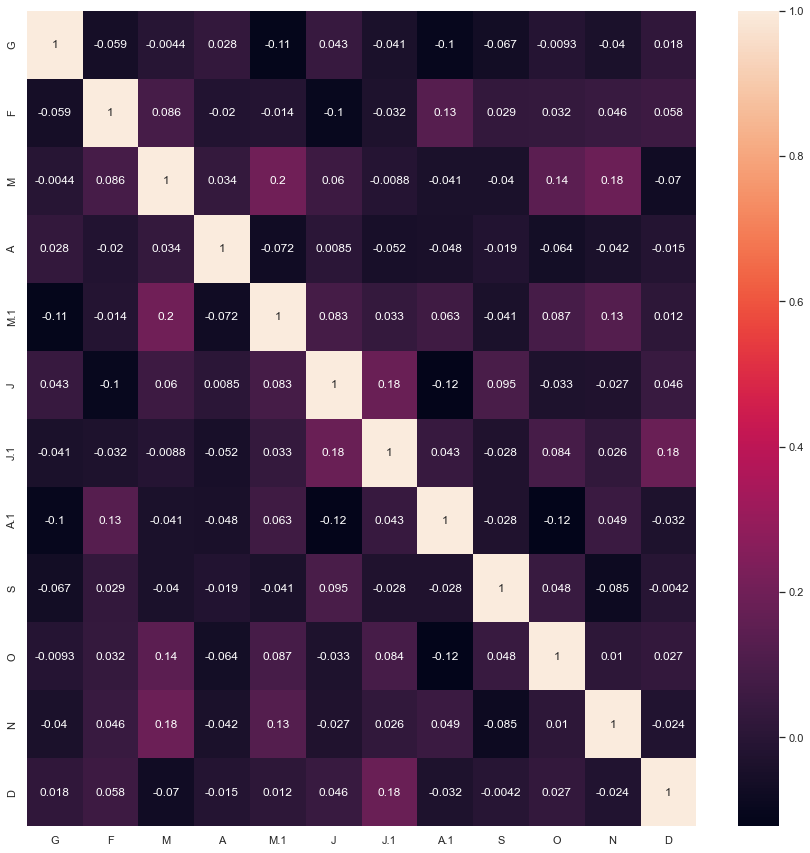

In [38]:
sns.set()
plt.figure(figsize=(15,15))
sns.heatmap(corMat.iloc[1:,1:], annot=True)
plt.show()

Igual que en la primera comparació, la resta de mesos presenten una correlació molt baixa entre ells. Per tant, sembla que no hi ha associació entre els diferents messos en relació a la pluja.